<a href="https://colab.research.google.com/github/RaghulJ06/DSAI/blob/main/capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import necessary metrics


import warnings
warnings .filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('/content/E_Commerce.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [ID, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N]
Index: []


In [6]:
df=df.drop('ID',axis=1)

In [7]:
print(df.head())

  Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1           

In [28]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Warehouse_block': 5, 'Mode_of_Shipment': 3, 'Product_importance': 3}

In [8]:
df['Gender'] = df['Gender'].replace({'F':0, 'M':1})
encoded_df = pd.get_dummies(df, columns=['Warehouse_block','Mode_of_Shipment','Product_importance']).astype(int)

In [9]:
encoded_df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,0,1,1538,1,1,0,0,0,0,0,0,1,0,0,1
10995,4,1,232,5,0,6,1247,0,0,1,0,0,0,0,0,1,0,0,1
10996,5,4,242,5,0,4,1155,0,0,0,1,0,0,0,0,1,0,1,0
10997,5,2,223,6,1,2,1210,0,0,0,0,0,1,0,0,1,0,0,1


<Axes: >

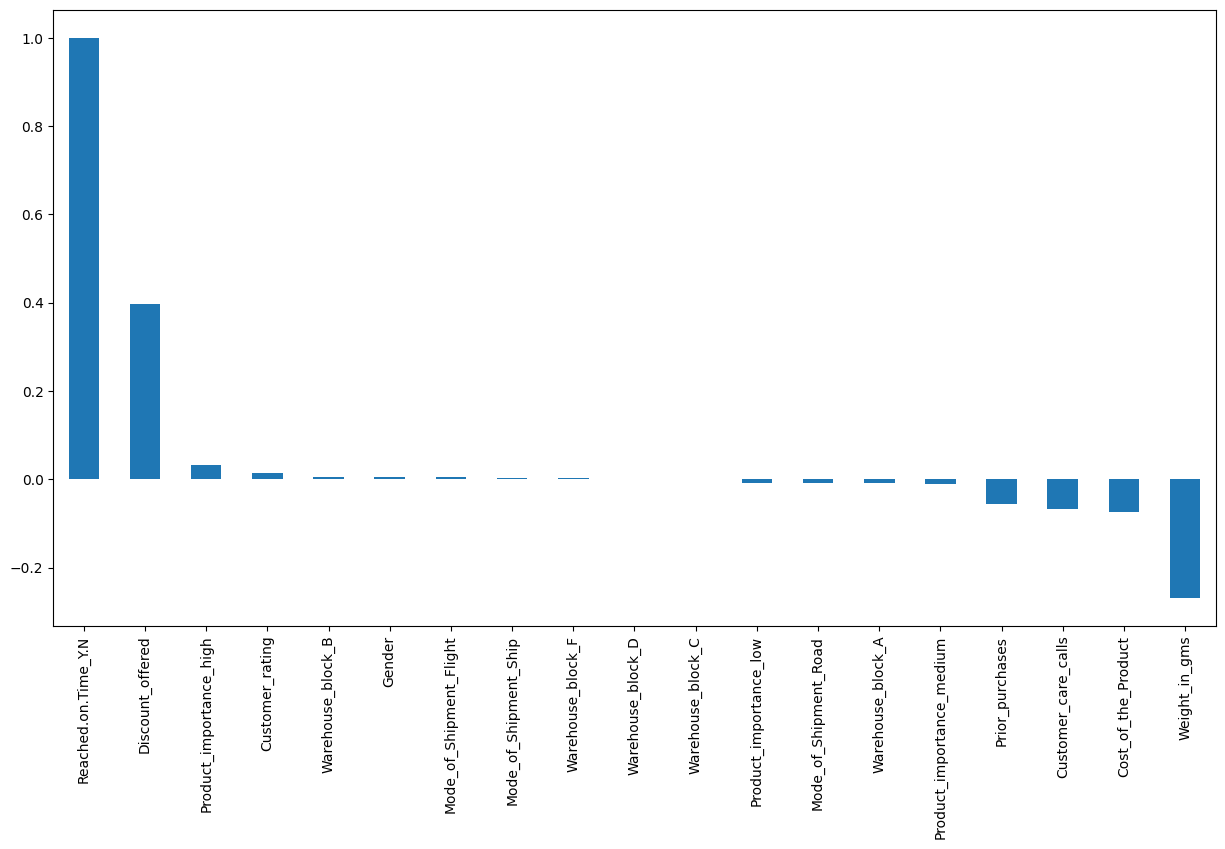

In [10]:
plt.figure(figsize=(15,8))
encoded_df.corr()['Reached.on.Time_Y.N'].sort_values(ascending = False).plot(kind='bar')

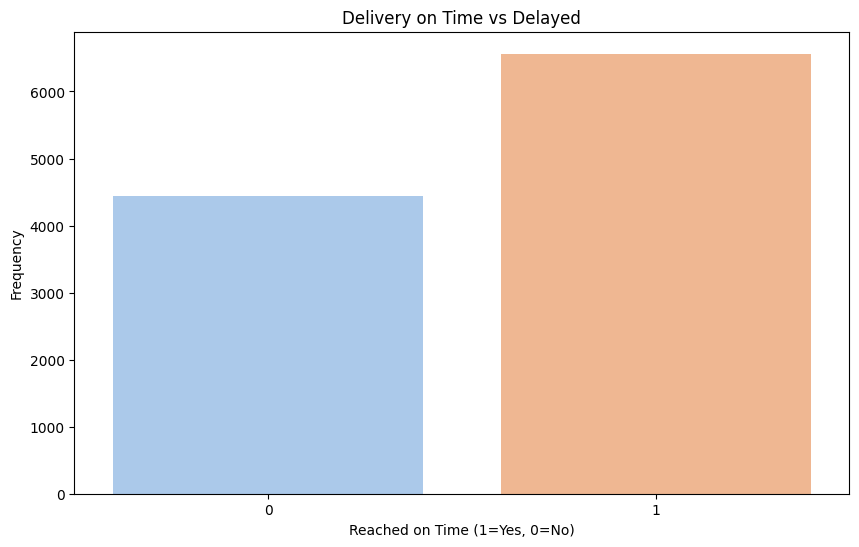

In [11]:
# 1. Distribution of Delivery Delays
plt.figure(figsize=(10, 6))
sns.countplot(x='Reached.on.Time_Y.N', data=df, palette='pastel')
plt.title('Delivery on Time vs Delayed')
plt.xlabel('Reached on Time (1=Yes, 0=No)')
plt.ylabel('Frequency')
plt.show()

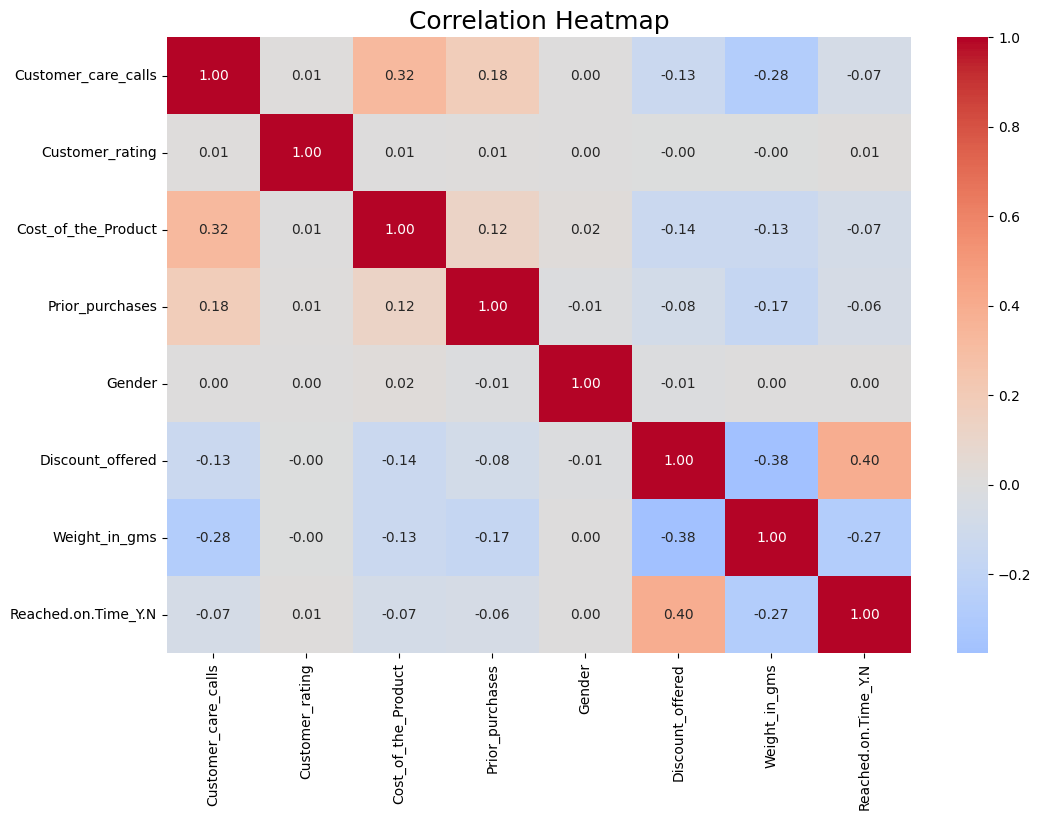

In [12]:
# ---------- Correlation Heatmap ----------
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

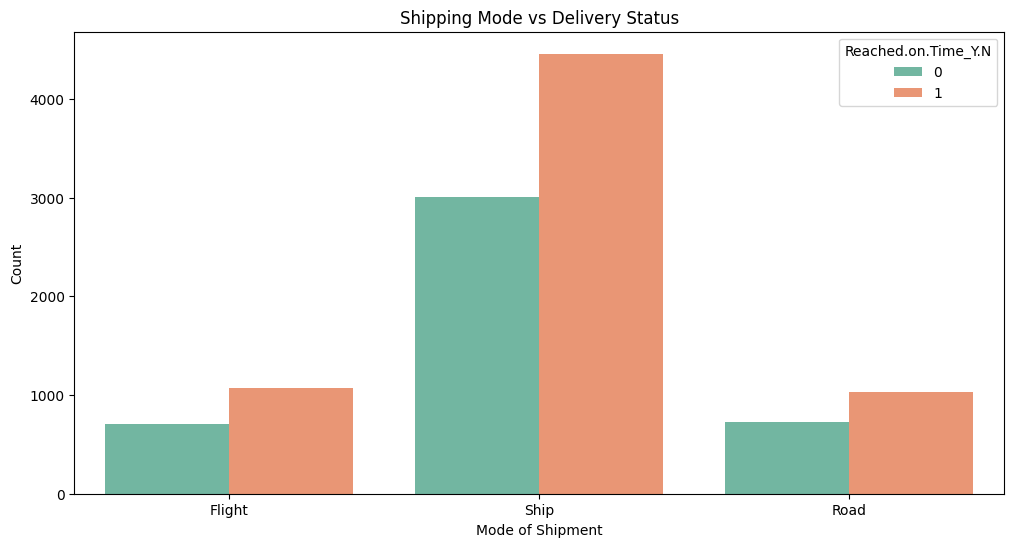

In [13]:
# 3. Distribution of Shipping Modes by Delivery Status
plt.figure(figsize=(12, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, palette='Set2')
plt.title('Shipping Mode vs Delivery Status')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.show()

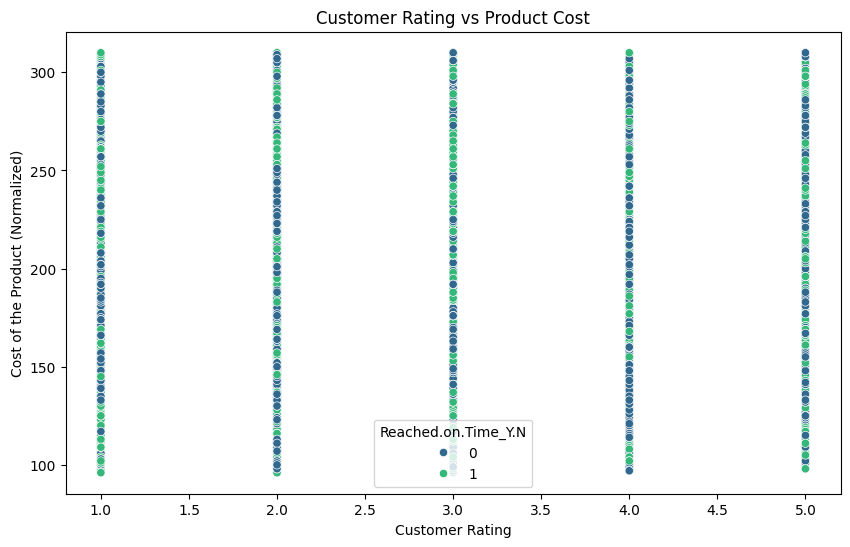

In [32]:
# 4. Customer Rating vs Product Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_rating', y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', data=df, palette='viridis')
plt.title('Customer Rating vs Product Cost')
plt.xlabel('Customer Rating')
plt.ylabel('Cost of the Product (Normalized)')
plt.show()

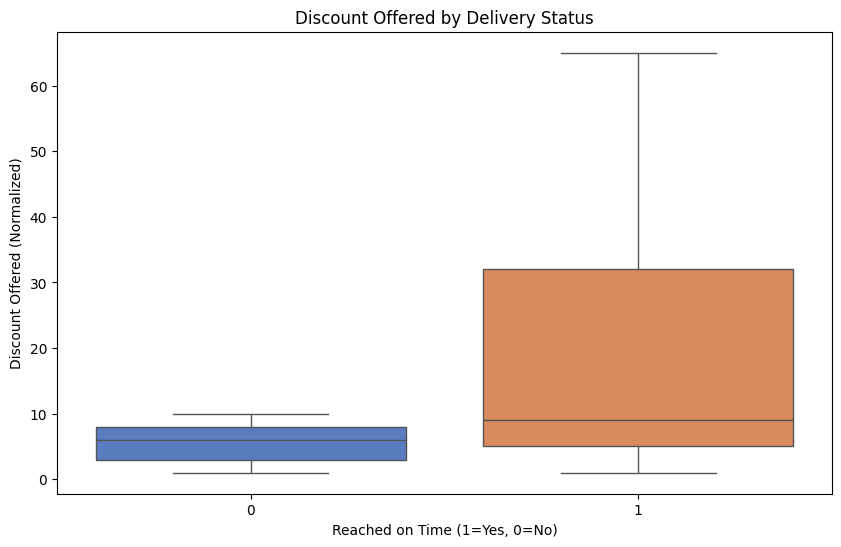

In [15]:
# 5. Discount Offered vs Delivery Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, palette='muted')
plt.title('Discount Offered by Delivery Status')
plt.xlabel('Reached on Time (1=Yes, 0=No)')
plt.ylabel('Discount Offered (Normalized)')
plt.show()

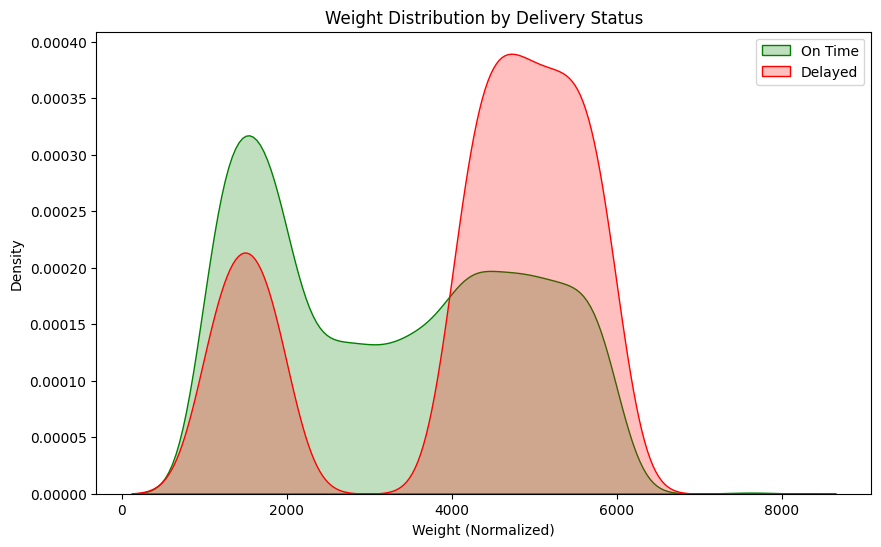

In [16]:
# 6. Weight Distribution by Delivery Status
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Reached.on.Time_Y.N'] == 1]['Weight_in_gms'], label='On Time', shade=True, color='green')
sns.kdeplot(df[df['Reached.on.Time_Y.N'] == 0]['Weight_in_gms'], label='Delayed', shade=True, color='red')
plt.title('Weight Distribution by Delivery Status')
plt.xlabel('Weight (Normalized)')
plt.ylabel('Density')
plt.legend()
plt.show()

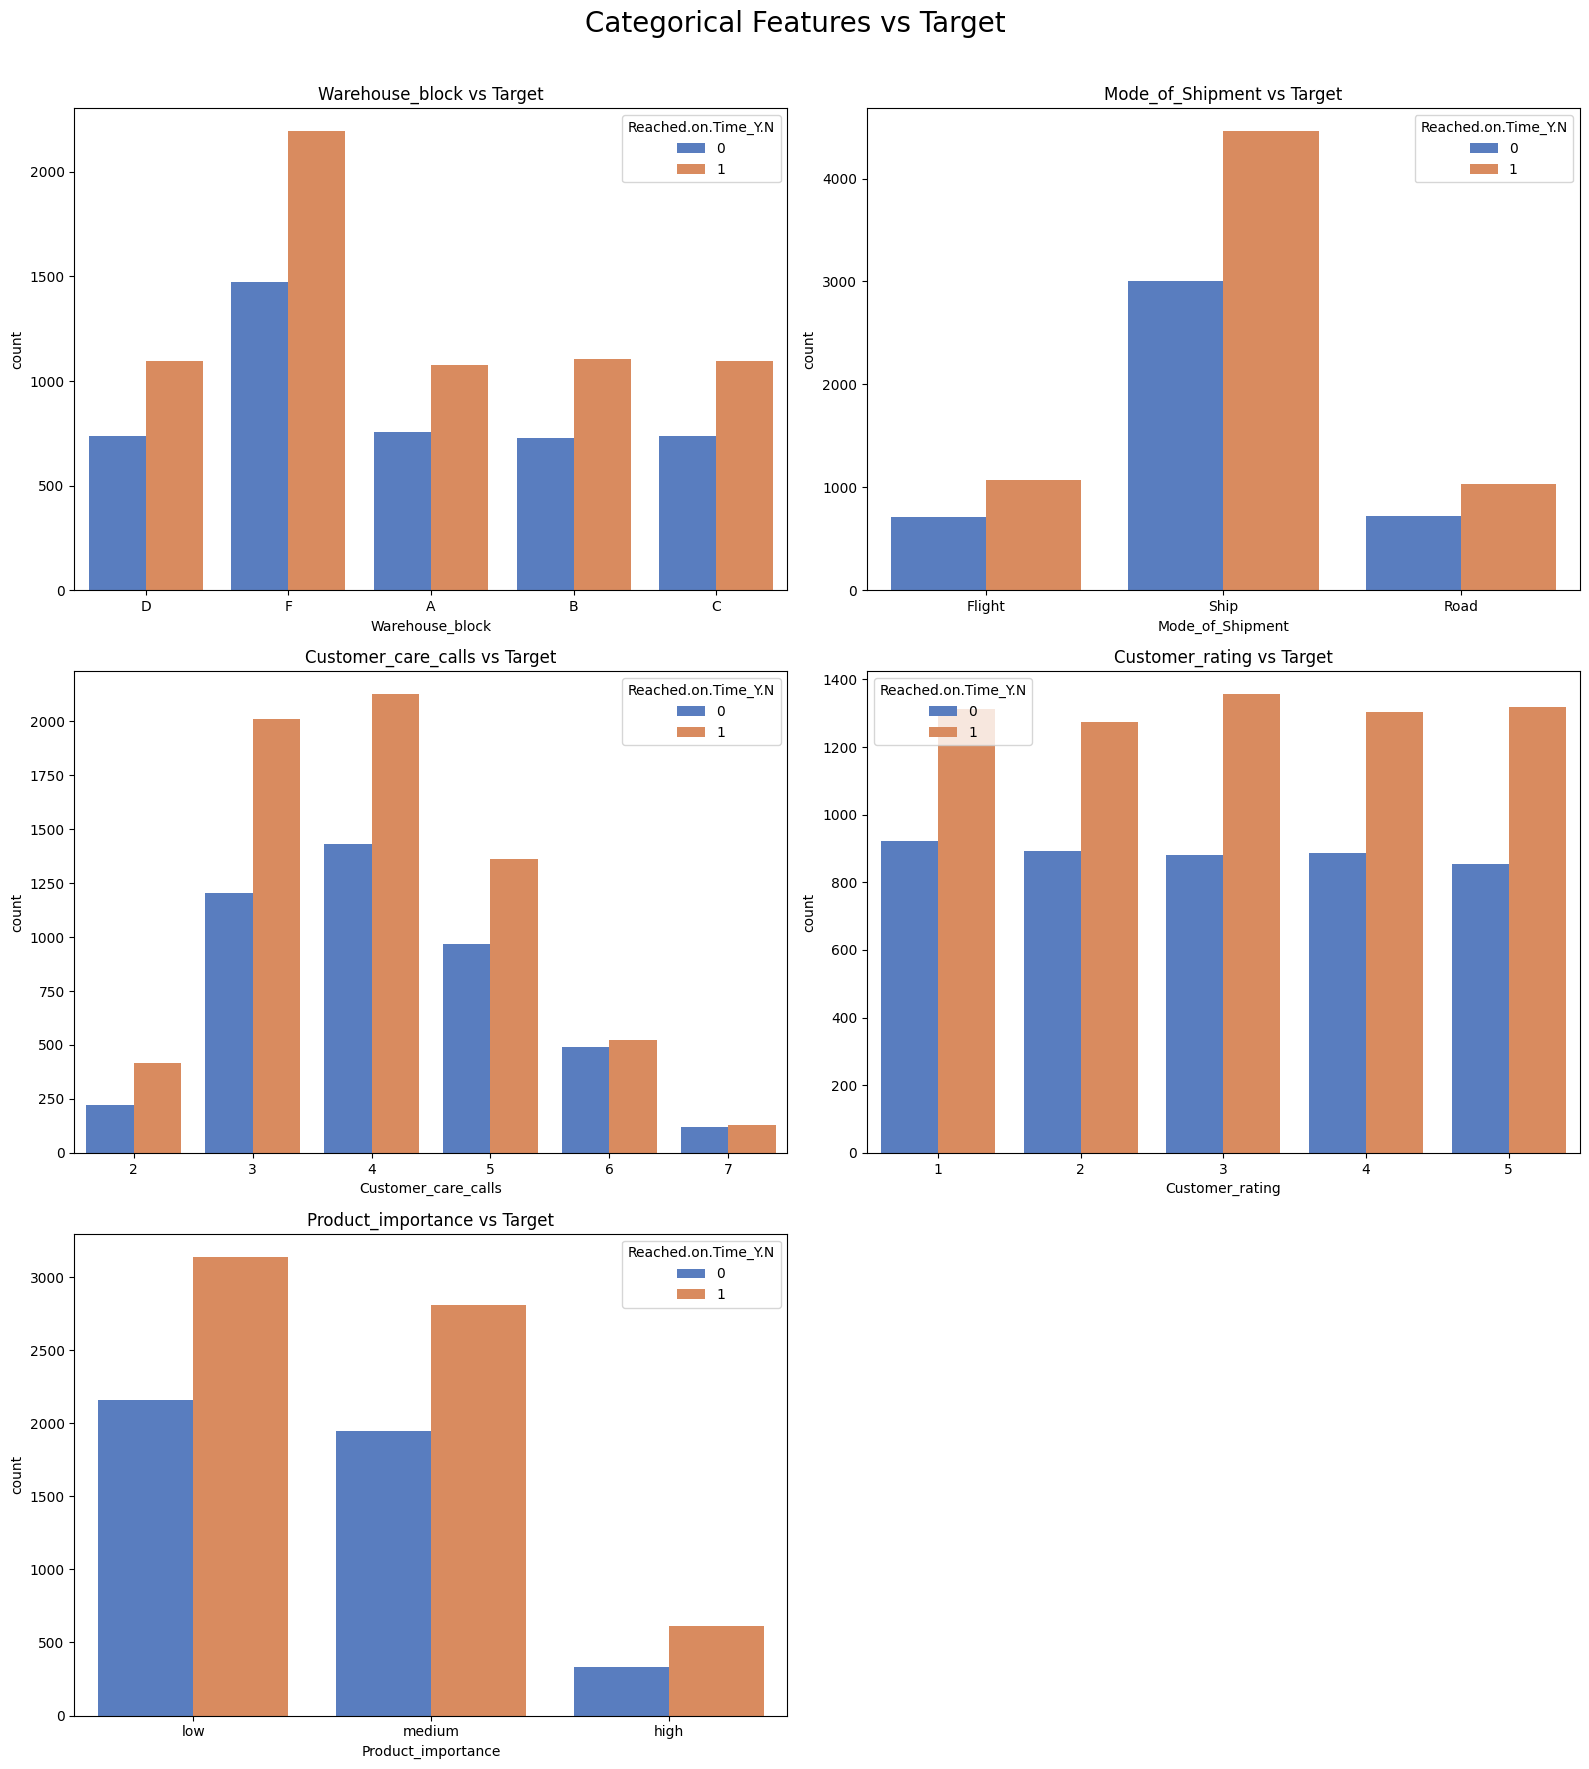

In [17]:
# ---------- Categorical Features vs Target ----------
categorical_features = ['Warehouse_block', 'Mode_of_Shipment',
                        'Customer_care_calls', 'Customer_rating', 'Product_importance']

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Categorical Features vs Target', fontsize=20)

for idx, feature in enumerate(categorical_features):
    row, col = divmod(idx, 2)
    sns.countplot(x=feature, hue='Reached.on.Time_Y.N', data=df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'{feature} vs Target')

# Remove any empty subplot
fig.delaxes(axes[2][1])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


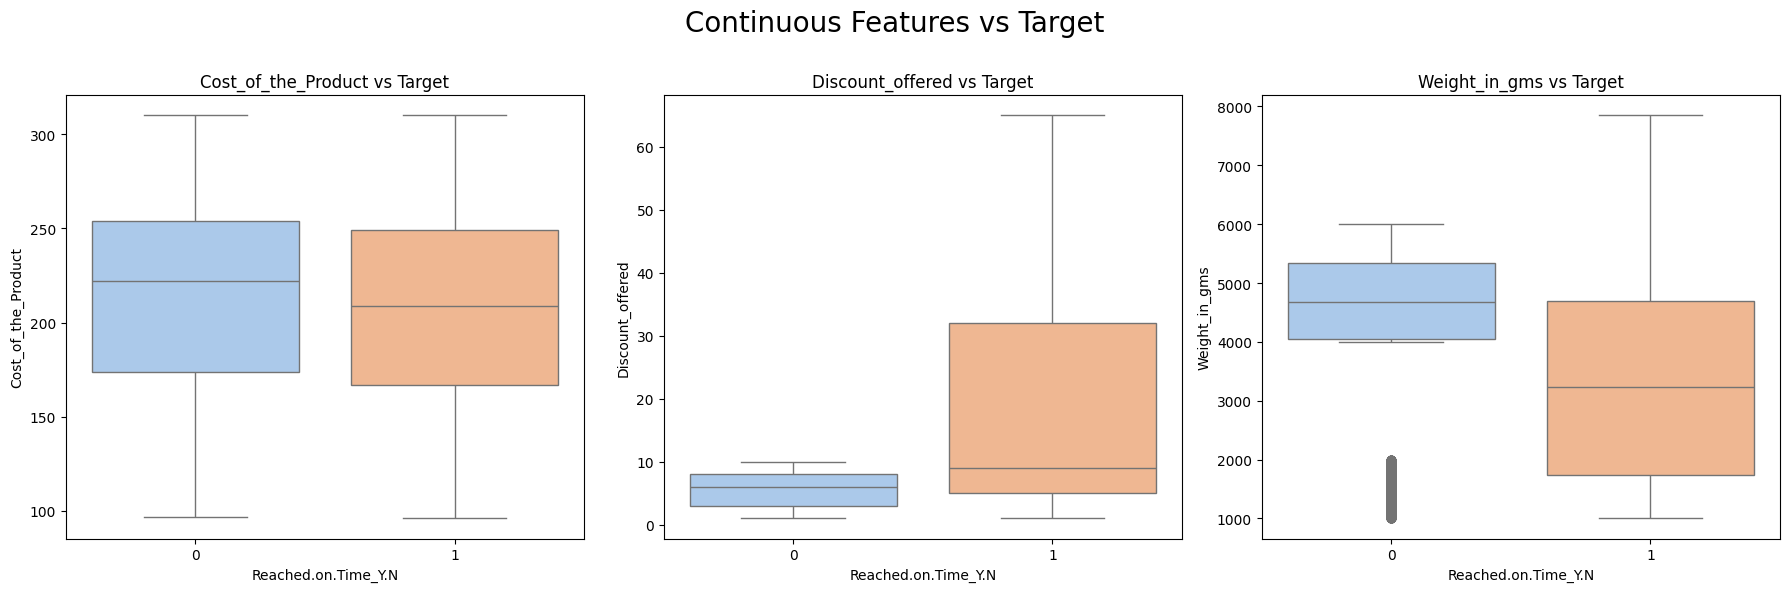

In [18]:
# ---------- Continuous Features vs Target ----------
continuous_features = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Continuous Features vs Target', fontsize=20)

for idx, feature in enumerate(continuous_features):
    sns.boxplot(x='Reached.on.Time_Y.N', y=feature, data=df, ax=axes[idx], palette='pastel')
    axes[idx].set_title(f'{feature} vs Target')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [19]:
y = encoded_df['Reached.on.Time_Y.N']
x = encoded_df.drop('Reached.on.Time_Y.N', axis=1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, shuffle=True, random_state=1)

In [21]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_train.columns)

In [22]:
x_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
4177,-0.051017,1.422394,-1.289402,-0.371349,1.001690,-0.266367,0.803593,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
1616,-0.923855,0.715649,-1.874430,-0.371349,-0.998313,3.091967,-1.245664,2.253122,-0.446551,-0.445505,-0.451563,-0.708485,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
2775,-0.051017,-1.404585,-0.683481,-0.371349,1.001690,0.355547,-1.064775,-0.443829,2.239385,-0.445505,-0.451563,-0.708485,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
10272,-0.051017,0.715649,-1.059570,-0.371349,1.001690,-0.515133,0.489031,-0.443829,-0.446551,-0.445505,2.214530,-0.708485,2.303364,-0.441940,-1.451099,-0.308738,-0.961639,1.145431
6836,-0.051017,0.008904,0.758195,-0.371349,-0.998313,-0.763898,0.963634,2.253122,-0.446551,-0.445505,-0.451563,-0.708485,-0.434148,2.262749,-1.451099,3.238988,-0.961639,-0.873034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-0.051017,-1.404585,0.611938,-0.371349,-0.998313,-0.577324,0.701805,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,2.303364,-0.441940,-1.451099,-0.308738,1.039891,-0.873034
10955,-1.796694,1.422394,-1.790855,0.290460,1.001690,-0.515133,1.363429,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,2.303364,-0.441940,-1.451099,-0.308738,1.039891,-0.873034
905,-0.051017,0.715649,-1.331190,-0.371349,1.001690,-0.017602,-1.531407,-0.443829,-0.446551,-0.445505,-0.451563,1.411463,-0.434148,-0.441940,0.689133,-0.308738,1.039891,-0.873034
5192,0.821822,0.715649,0.465681,-0.371349,1.001690,-0.328559,0.879015,2.253122,-0.446551,-0.445505,-0.451563,-0.708485,-0.434148,2.262749,-1.451099,-0.308738,1.039891,-0.873034


In [23]:
y_train

,Reached.on.Time_Y.N
4177,1
1616,1
2775,1
10272,0
6836,0
...,...
7813,0
10955,0
905,1
5192,1


In [24]:
# --- Define Models ---
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), # Call the XGBClassifier class
    "LightGBM": LGBMClassifier(random_state=42),
}

[LightGBM] [Info] Number of positive: 4605, number of negative: 3094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 7699, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.598130 -> initscore=0.397678
[LightGBM] [Info] Start training from score 0.397678


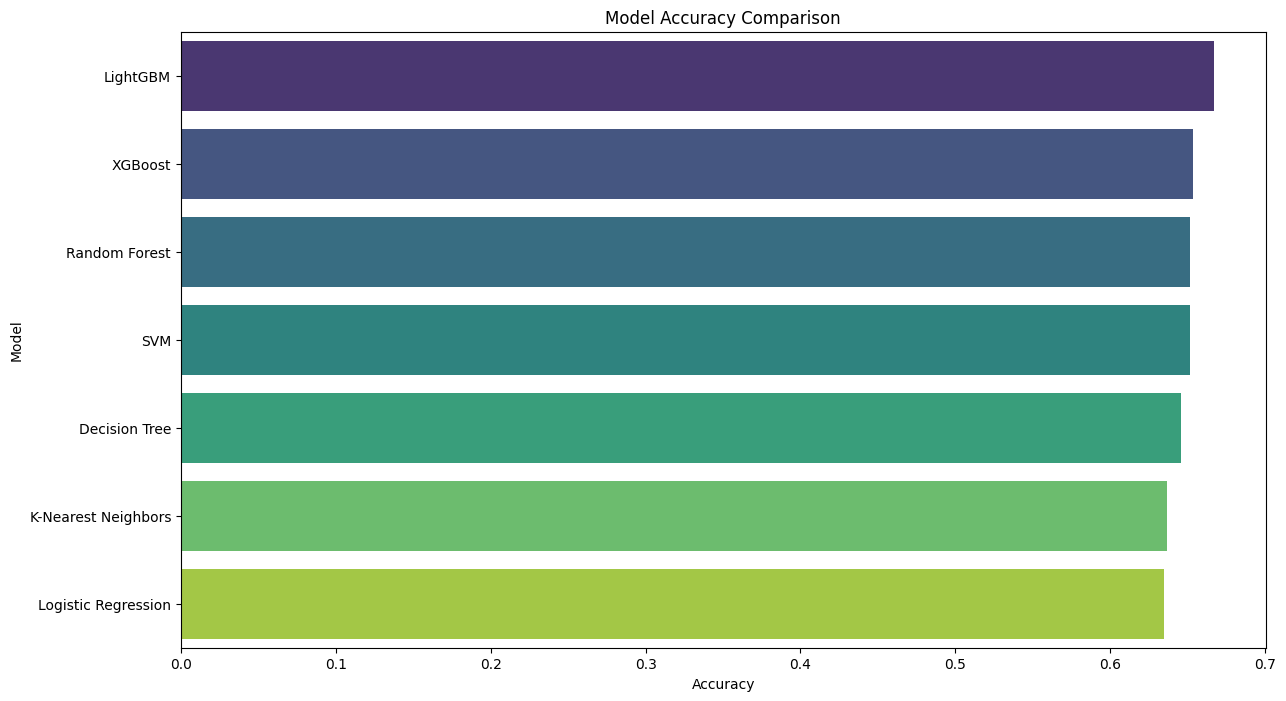

In [25]:
results = []

for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Create a DataFrame with results
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

# --- Visualization of Model Performance ---
plt.figure(figsize=(14, 8))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.56      0.69      0.62      1342
           1       0.75      0.62      0.68      1958

    accuracy                           0.65      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.65      0.65      3300



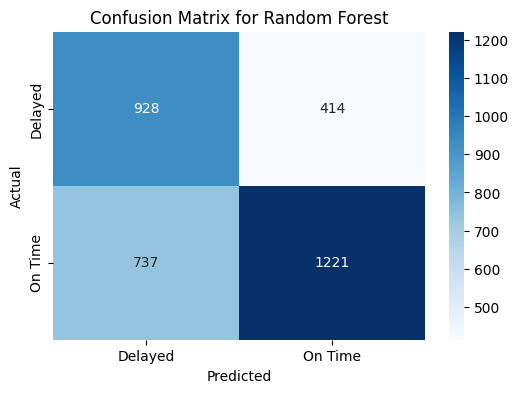


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1342
           1       0.70      0.70      0.70      1958

    accuracy                           0.65      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.65      0.65      3300



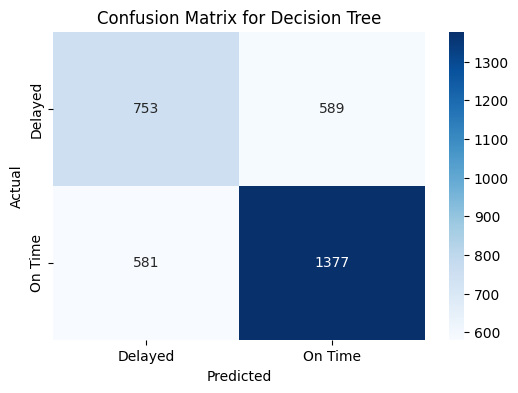


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1342
           1       0.70      0.68      0.69      1958

    accuracy                           0.63      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.63      0.64      3300



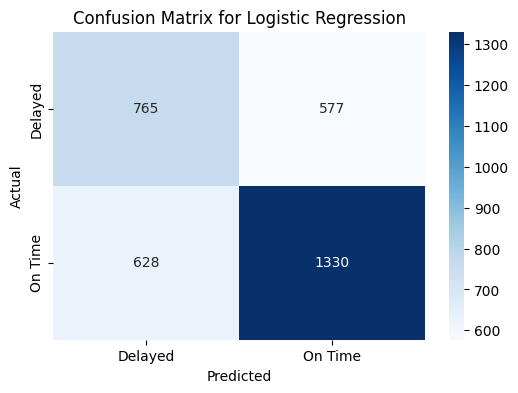


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1342
           1       0.70      0.67      0.69      1958

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300



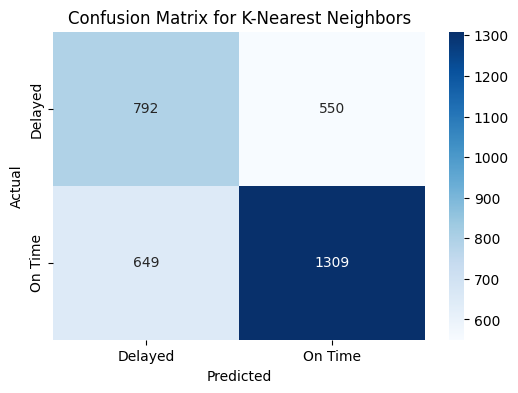


--- SVM ---
              precision    recall  f1-score   support

           0       0.56      0.70      0.62      1342
           1       0.75      0.62      0.68      1958

    accuracy                           0.65      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.65      0.65      3300



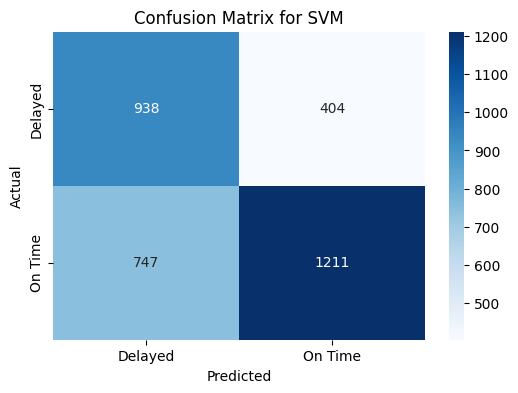


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.56      0.65      0.61      1342
           1       0.73      0.65      0.69      1958

    accuracy                           0.65      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.65      0.66      3300



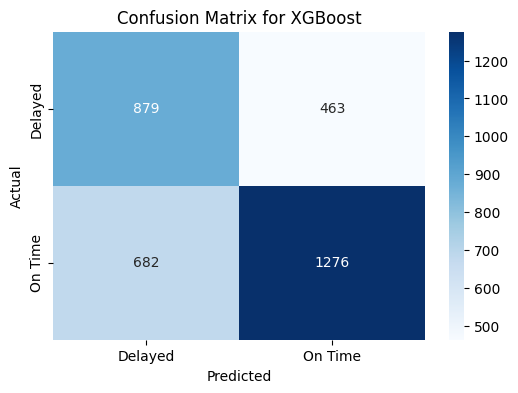


--- LightGBM ---
              precision    recall  f1-score   support

           0       0.57      0.74      0.64      1342
           1       0.78      0.62      0.69      1958

    accuracy                           0.67      3300
   macro avg       0.67      0.68      0.67      3300
weighted avg       0.69      0.67      0.67      3300



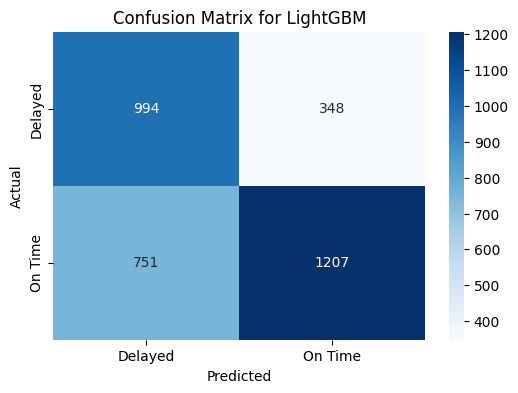

In [26]:
# --- Detailed Report for Each Model ---
from sklearn.metrics import classification_report, confusion_matrix # Import classification_report and confusion_matrix

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Delayed', 'On Time'], yticklabels=['Delayed', 'On Time'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()